資料來源 Kaggle    
https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

使用 pandas 讀取 CSV 文件   

In [17]:
loan=pd.read_csv('loan_data.csv')
loan

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


檢查數據類型和缺失值

In [3]:
print(loan.dtypes)
print(loan.isnull().sum())

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
cr

數據編碼：  
將性別、貸款違約紀錄、教育程度等類別進行編碼    
使用 pd.get_dummies 對房屋擁有狀況和貸款目的進行編碼

In [4]:
#性別
loan['person_gender'] = loan['person_gender'].map({'female': 0, 'male': 1})

#貸款違約紀錄
loan['previous_loan_defaults_on_file'] = loan['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

#教育程度
education_mapping = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
loan['person_education'] = loan['person_education'].map(education_mapping)

#房屋擁有狀況
loan = pd.get_dummies(loan, columns=['person_home_ownership'], prefix='home_ownership')

#貸款目的
loan = pd.get_dummies(loan, columns=['loan_intent'], prefix='loan_intent')

確認型態

In [5]:
#原數字型態: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
#原文字型態: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

list1=[]
list2=[]
list3=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
for i in loan.columns:
    if loan[i].dtype=='object':
        try:
            loan[i]=loan[i].astype('float')
            list1.append(i)
        except:
            list2.append(i)
    else:
        list1.append(i)
print('數字型態:',list1)
print('文字型態:',list2)
print('原數字型態:',list3)

數字型態: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']
文字型態: []
原數字型態: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [6]:
label={ 'person_age': '借款人的年齡',
        'person_gender': '借款人的性別',
        'person_education': '借款人的教育程度 高中 -> 0，專科 -> 1，學士 -> 2，碩士 -> 3，博士 -> 4。',
        'person_income': '借款人的年收入',
        'person_emp_exp': '借款人的工作經驗（年數）',
        
        'home_ownership_MORTGAGE': '抵押房產',
        'home_ownership_OTHER': '其他房產',
        'home_ownership_OWN': '自有房產',
        'home_ownership_RENT': '租房',

        'loan_amnt': '貸款金額',
        
        'loan_intent_DEBTCONSOLIDATION':'貸款用途:債務合併',
        'loan_intent_EDUCATION':'貸款用途:教育',
        'loan_intent_HOMEIMPROVEMENT':'貸款用途:家庭裝修',
        'loan_intent_MEDICAL':'貸款用途:醫療',
        'loan_intent_PERSONAL':'貸款用途:個人',
        'loan_intent_VENTURE':'貸款用途:創業',

        'loan_int_rate': '貸款利率（百分比）',
        'loan_percent_income': '貸款金額佔年收入的百分比',
        'cb_person_cred_hist_length': '信用歷史長度（年數）',
        'credit_score': '信用評分',
        'previous_loan_defaults_on_file': '是否有過往貸款違約記錄（No: 0, Yes: 1）',
        'loan_status': '貸款狀態（1: 批准, 0: 拒絕）'}

繪製數據圖表

借款人的年齡


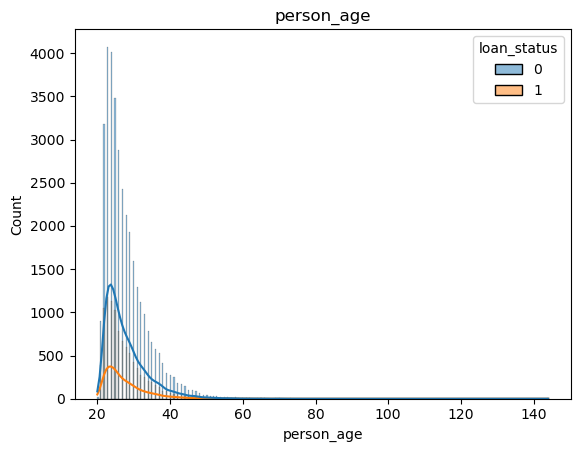

借款人的性別


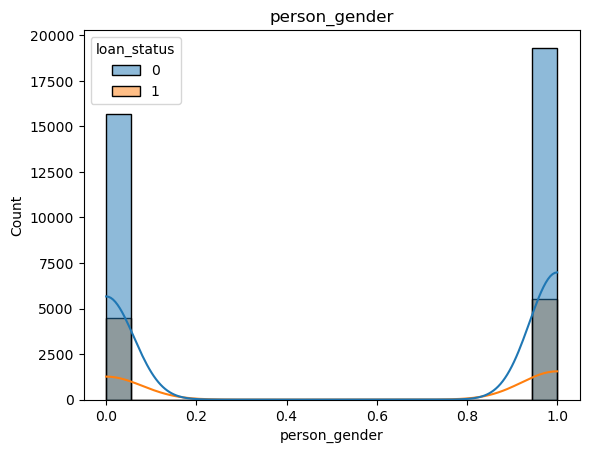

借款人的教育程度 高中 -> 0，專科 -> 1，學士 -> 2，碩士 -> 3，博士 -> 4。


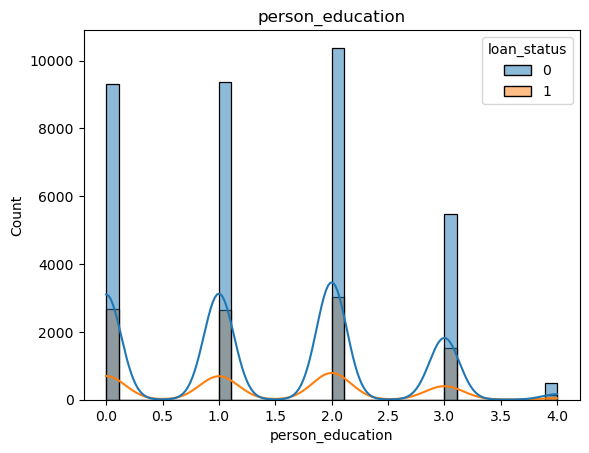

借款人的年收入


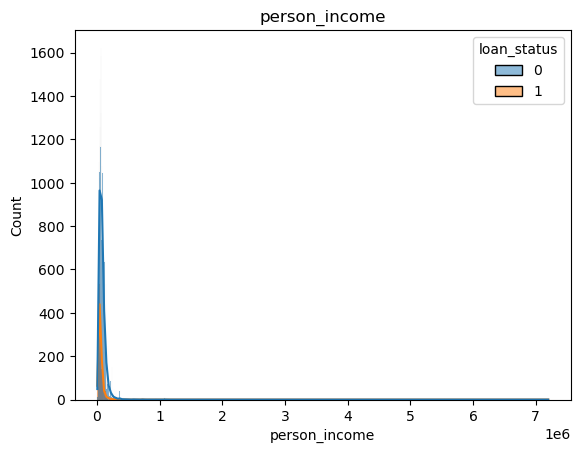

借款人的工作經驗（年數）


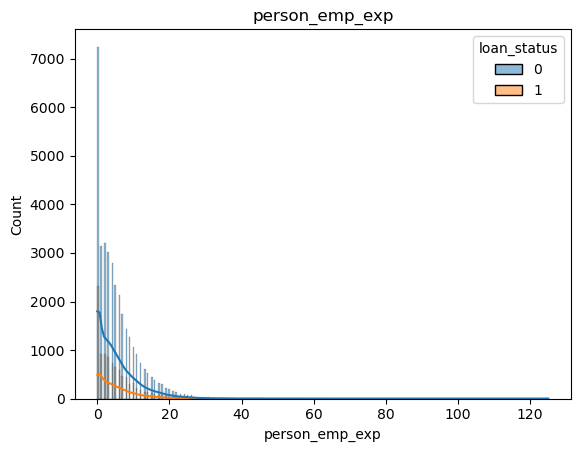

貸款金額


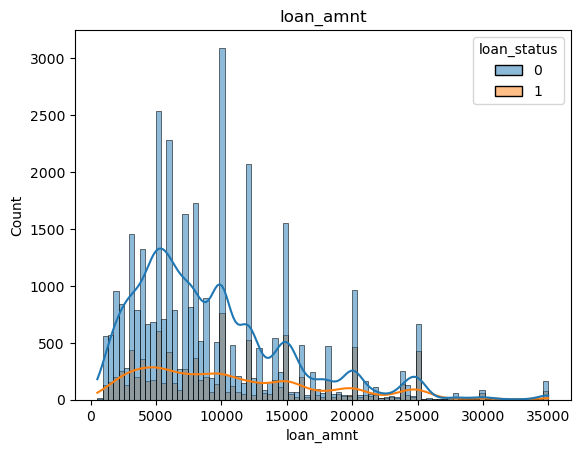

貸款利率（百分比）


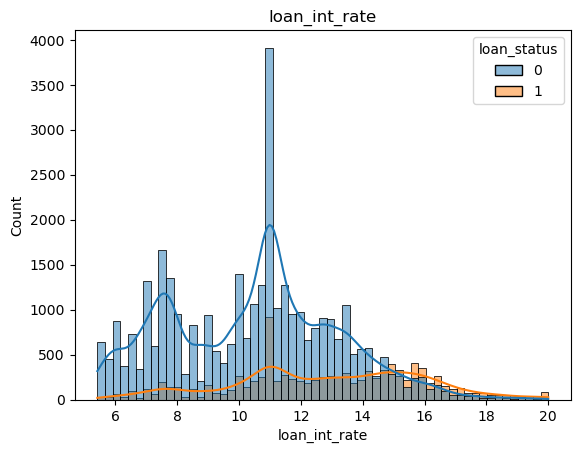

貸款金額佔年收入的百分比


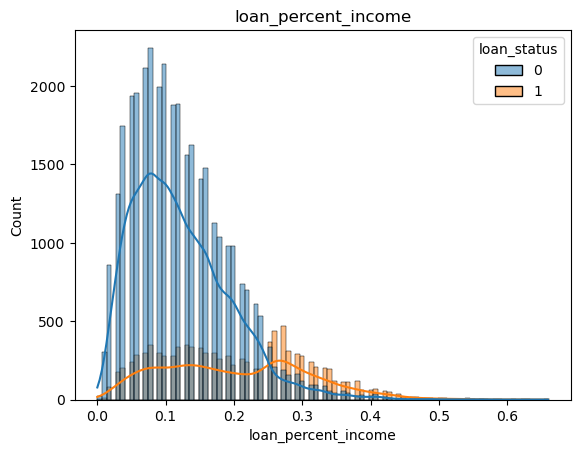

信用歷史長度（年數）


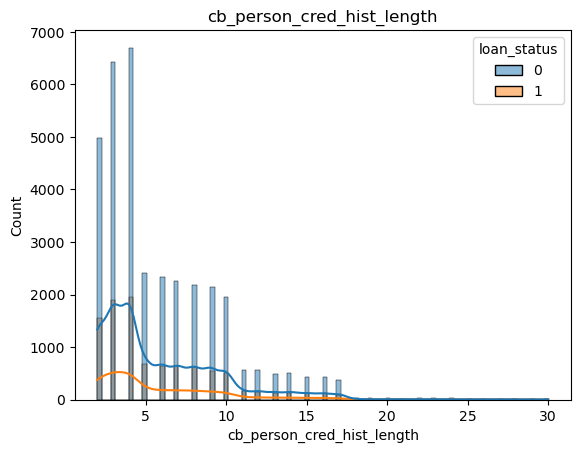

信用評分


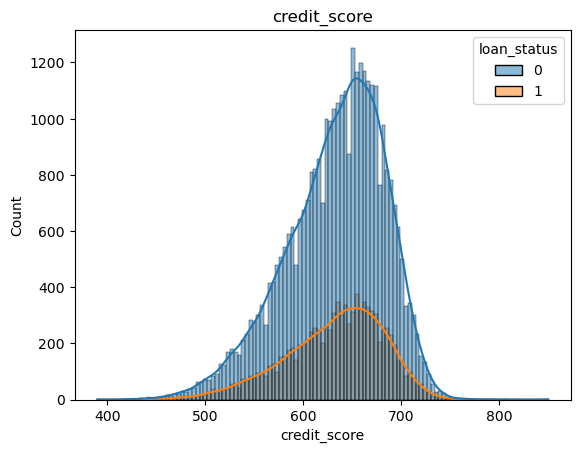

是否有過往貸款違約記錄（No: 0, Yes: 1）


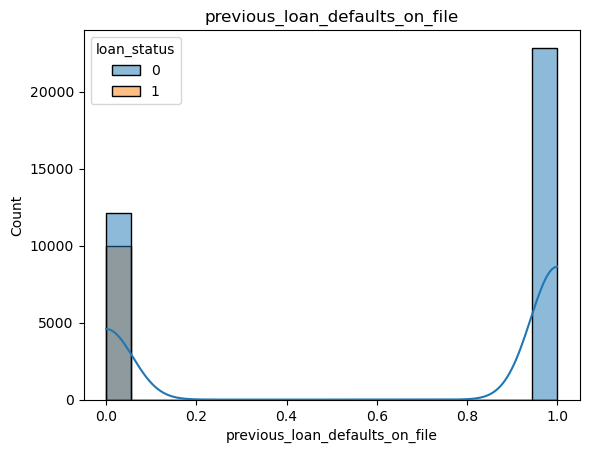

貸款狀態（1: 批准, 0: 拒絕）


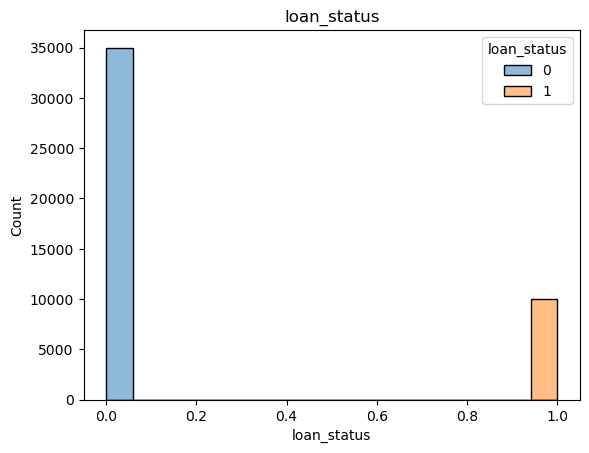

抵押房產


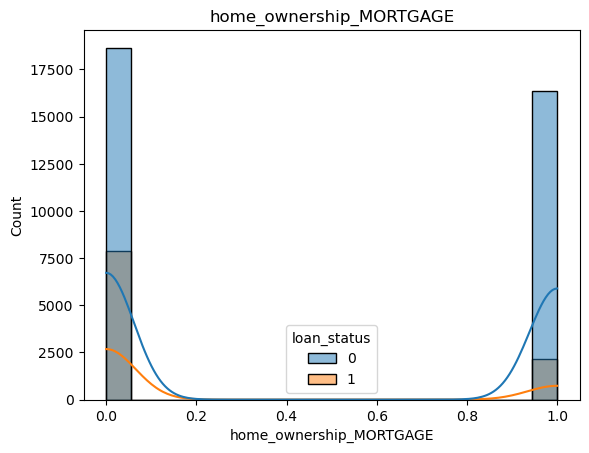

其他房產


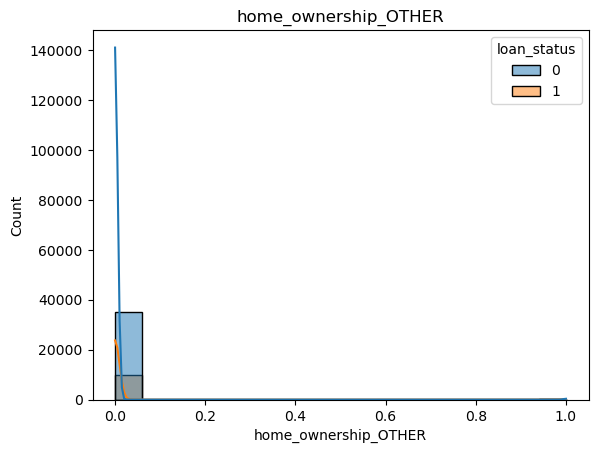

自有房產


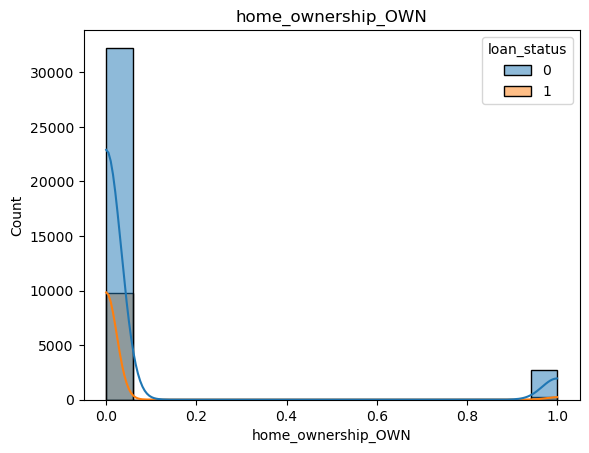

租房


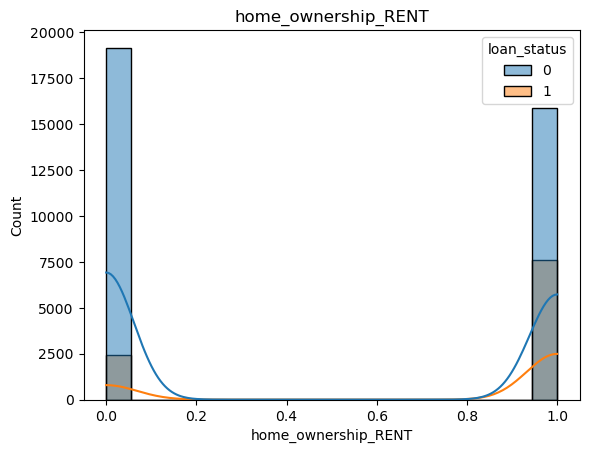

貸款用途:債務合併


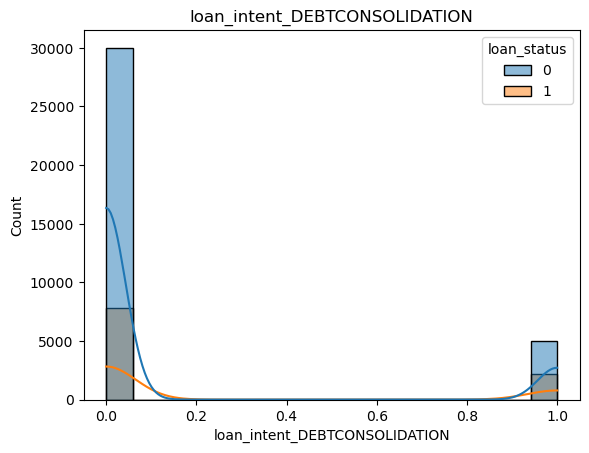

貸款用途:教育


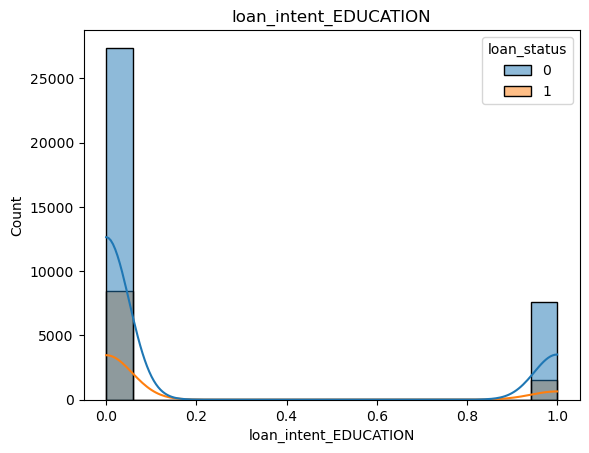

貸款用途:家庭裝修


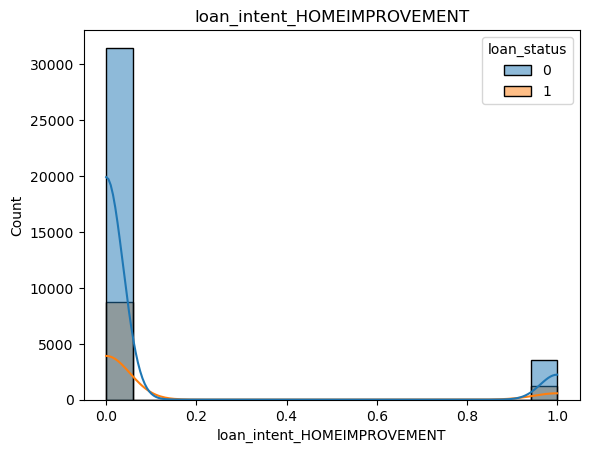

貸款用途:醫療


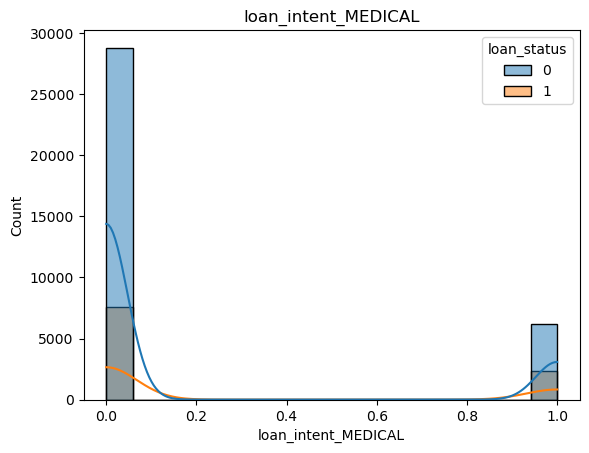

貸款用途:個人


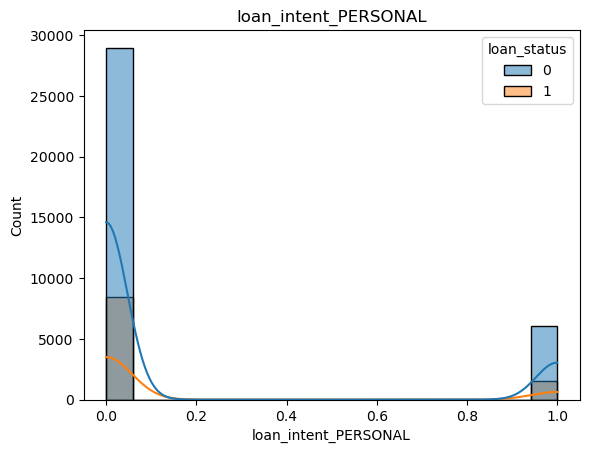

貸款用途:創業


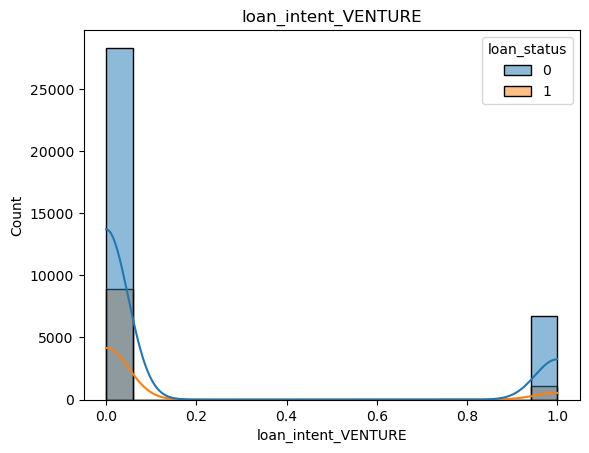

In [7]:
for cols in list1:
    print(label.get(cols)) 
    plt.title(cols) 
    sns.histplot(x=cols, hue='loan_status', kde=True, data=loan) 
    plt.show()

借款人的年齡


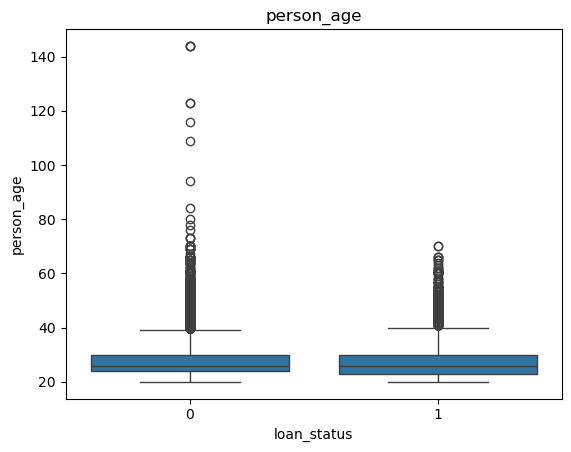

借款人的年收入


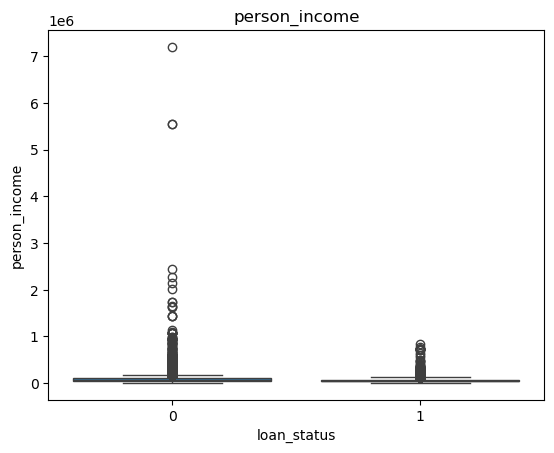

借款人的工作經驗（年數）


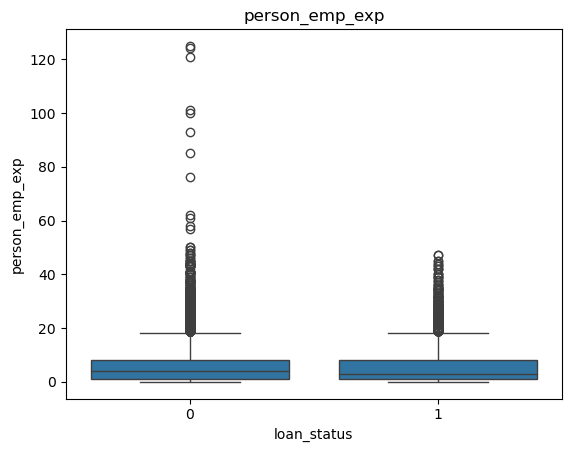

貸款金額


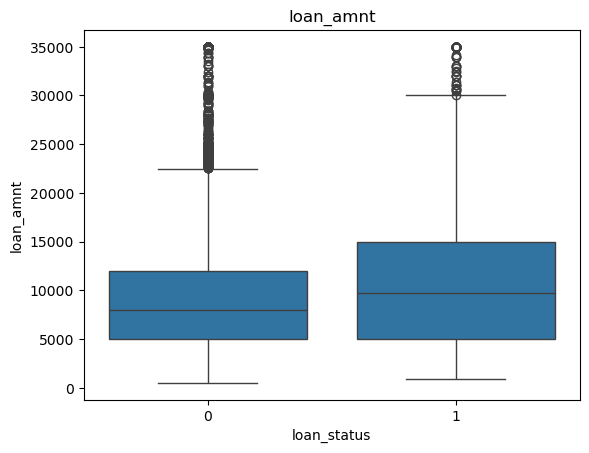

貸款利率（百分比）


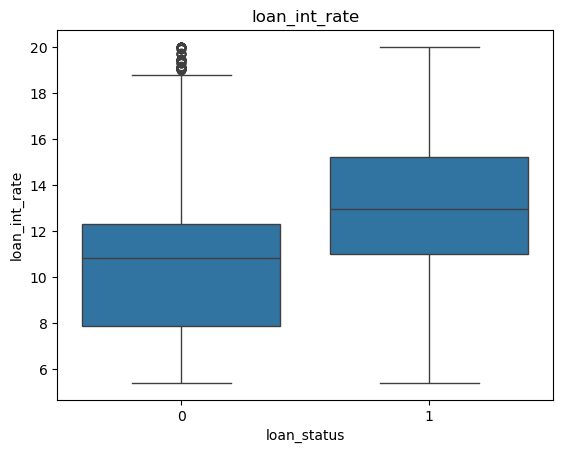

貸款金額佔年收入的百分比


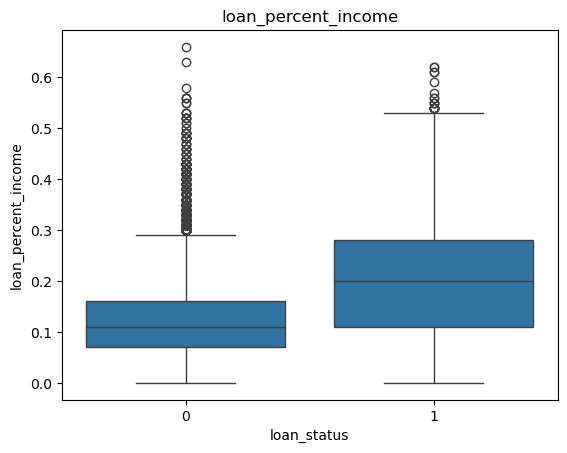

信用歷史長度（年數）


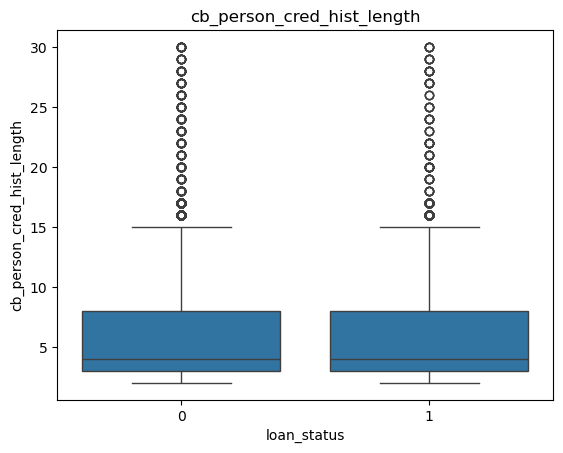

信用評分


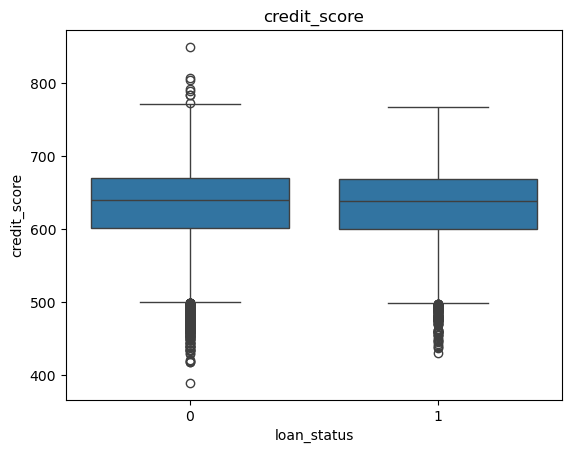

貸款狀態（1: 批准, 0: 拒絕）


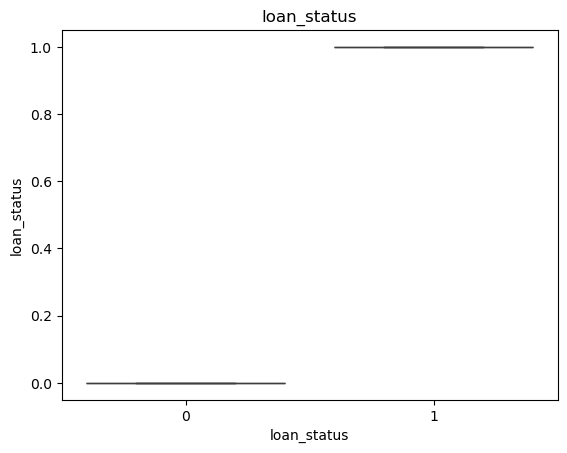

In [8]:
for cols in list3:
    print(label.get(cols))
    plt.title(cols)
    sns.boxplot(x='loan_status', y=cols, data=loan)
    plt.show()

計算相關係數矩陣並繪製熱圖

                                person_age  person_gender  person_education  \
person_age                        1.000000       0.017528         -0.002071   
person_gender                     0.017528       1.000000         -0.003914   
person_education                 -0.002071      -0.003914          1.000000   
person_income                     0.193698       0.010173          0.002097   
person_emp_exp                    0.954412       0.015078         -0.005449   
loan_amnt                         0.050750       0.010647          0.003027   
loan_int_rate                     0.013402       0.003662          0.003683   
loan_percent_income              -0.043299      -0.000367         -0.004344   
cb_person_cred_hist_length        0.861985       0.011999         -0.004965   
credit_score                      0.178432      -0.000223          0.211329   
previous_loan_defaults_on_file   -0.025917       0.000704         -0.040181   
loan_status                      -0.021476      -0.0

<Axes: >

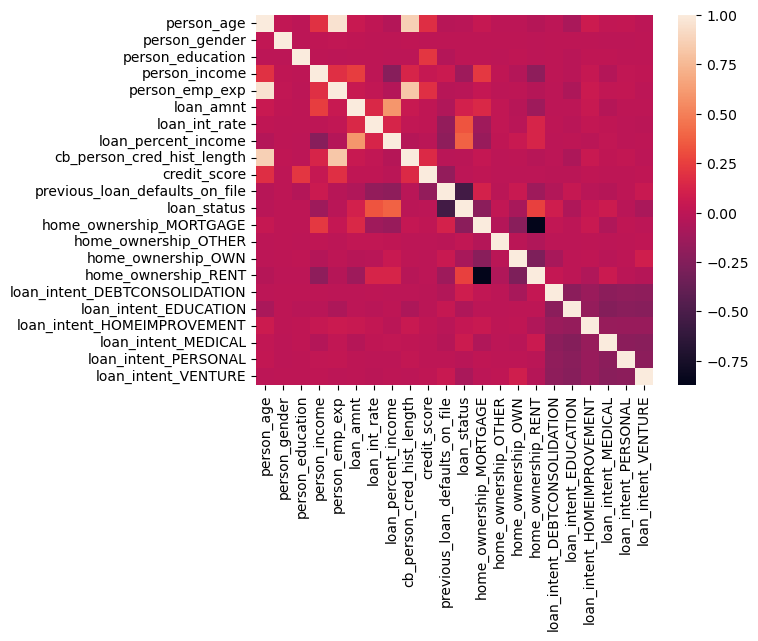

In [9]:
print(loan.corr())
sns.heatmap(loan.corr())

相關係數矩陣

In [10]:
print(loan.corr()['loan_status'].sort_values(ascending=False))

loan_status                       1.000000
loan_percent_income               0.384880
loan_int_rate                     0.332005
home_ownership_RENT               0.255239
loan_amnt                         0.107714
loan_intent_DEBTCONSOLIDATION     0.084130
loan_intent_MEDICAL               0.065195
loan_intent_HOMEIMPROVEMENT       0.033838
home_ownership_OTHER              0.013645
person_gender                    -0.000561
person_education                 -0.001108
credit_score                     -0.007647
cb_person_cred_hist_length       -0.014851
person_emp_exp                   -0.020481
person_age                       -0.021476
loan_intent_PERSONAL             -0.022488
loan_intent_EDUCATION            -0.064006
loan_intent_VENTURE              -0.085992
home_ownership_OWN               -0.093666
person_income                    -0.135808
home_ownership_MORTGAGE          -0.213451
previous_loan_defaults_on_file   -0.543096
Name: loan_status, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN #過採樣
from imblearn.under_sampling import RandomUnderSampler,NearMiss #欠採樣
import joblib

隨機森林    
使用隨機森林模型進行分類預測，並計算訓練和測試的準確率、分類報告和混淆矩陣。

In [12]:
print('隨機森林模型')
X=loan.drop('loan_status',axis=1)
y=loan['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42) # 調整樹的數量 # 設定樹的最大深度

model.fit(X_train,y_train)

joblib.dump(model,'loan.pkl')
model2=joblib.load('loan.pkl')

predict1=model2.predict(X_test)
predict2=model2.predict(X_train)

print('train準確率:',accuracy_score(y_train,predict2))
print('test準確率:',accuracy_score(y_test,predict1))
print('分類報告:\n',classification_report(y_test,predict1))
print('混淆矩陣:\n',confusion_matrix(y_test,predict1))

隨機森林模型
train準確率: 0.9328253968253968
test準確率: 0.9226666666666666
分類報告:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10493
           1       0.91      0.72      0.81      3007

    accuracy                           0.92     13500
   macro avg       0.92      0.85      0.88     13500
weighted avg       0.92      0.92      0.92     13500

混淆矩陣:
 [[10281   212]
 [  832  2175]]


過採樣      
使用 SMOTE 進行過採樣處理，以平衡數據集中的類別不平衡問題

In [13]:
print('SMOTE 過採樣')

ros=SMOTE()
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)
model.fit(X_train_ros,y_train_ros)

df1=pd.DataFrame({'feature1':X_train.iloc[:,0],'feature2':X_train.iloc[:,1],'loan_status':y_train})
print(df1['loan_status'].value_counts())
plt.show()

df1=pd.DataFrame({'feature1':X_train_ros.iloc[:,0],'feature2':X_train_ros.iloc[:,1],'loan_status':y_train_ros})
print(df1['loan_status'].value_counts())
plt.show()

model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42) # 調整樹的數量 # 設定樹的最大深度

model.fit(X_train_ros,y_train_ros)

joblib.dump(model,'loan_smote.pkl')
model2=joblib.load('loan_smote.pkl')

predict1=model2.predict(X_test)
predict2=model2.predict(X_train_ros)

print('train準確率:',accuracy_score(y_train_ros,predict2))
print('test準確率:',accuracy_score(y_test,predict1))
print('分類報告:\n',classification_report(y_test,predict1))
print('混淆矩陣:\n',confusion_matrix(y_test,predict1))

SMOTE 過採樣
loan_status
0    24507
1     6993
Name: count, dtype: int64
loan_status
0    24507
1    24507
Name: count, dtype: int64
train準確率: 0.9382217325662056
test準確率: 0.9036296296296297
分類報告:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     10493
           1       0.74      0.86      0.80      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.89      0.87     13500
weighted avg       0.91      0.90      0.91     13500

混淆矩陣:
 [[9605  888]
 [ 413 2594]]
